# <center>Handwritten Digit Recognition using a Neural Network</center>

## Dataset

For training and testing our neural network we are going to use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). It's a dataset of handwritten digits containing 60000 training examples and 10000 test examples. The dataset contains 28x28 grayscale images and a set of labels for each image. We first begin by visualizing some data from the training set.

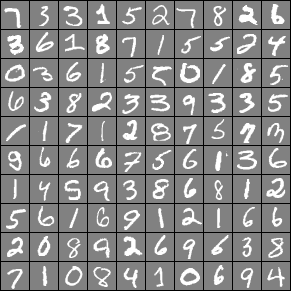

In [2]:
addpath('data')
addpath('..')

images = loadMNISTImages('../train-images.idx3-ubyte');

sel = randperm(size(images, 1));
sel = sel(1:100);
displayData(images(sel, :));

## Model representation

The goal is, given a training set, to learn a function h : X → Y so that h(x) is a good predictor for the corresponding value of y. That is, to find a function, that for a given image (a set of pixels) predicts a good label (a digit from 0 to 9).

![Model Representation](data/model_representation.png)

## Neural Network model

The first step is to design the arhitecture of our neural network. For the input layer, as we have 28x28 resolution images, we can create an input layer of 28 * 28 = 784 units. For the ouput layer, we have 10 units correspoding to 10 possible digits, from 0 to 9. For the number of hidden layers and units in those layers, by having a look on different [discussion boards](http://stats.stackexchange.com/a/136542) I found out that one hidden layer with

$\begin{}N_h = \frac{N_s} {(alpha * (N_i + N_o))}\end{}$
, where $N_h$ - number of hidden units, $N_s$ - number of samples, $N_i$ - number of input units and $N_o$ - number of output units is a good number. In our case, that means approximatively 35 hidden units. With those numbers in mind, our network looks like this:

![Neural Network model](data/neural_network_model.png)

## Training the Neural Network

In order to train the model, we need to define what it means for the model to be good. We know a model is good when the error is small, therefore, a function needs to be defined that actually says how high the error is. This function is called the cost, or the loss, and it represents how far off our model is from the desired outcome. We try to minimize that error, and the smaller the error margin, the better our model is.

### Feedforward propagation

The hypothesis can be computed using an algorithm called feedforward propagation. The idea is that the input is propagated forward towards the last layer of the network. For each layer, we multiply the output from the last layer with a set of weights available to each layer, referred to as $\Theta$, and the result is then "activated" using an activation function (the most used one is the sigmoid function) and passed to the next layer. The output of the last layer is the result of the hypothesis for a given input.

From intuition we can notice that the only data we need to compute the hypothesis for a given image (whose result is the digit in the label), is the set of weights for each layer. Therefore, to train the neural network we need to find the set of weights which gives us the best accuracy for our data.

### The cost function

From various internet resources (such as [this StackExchange post](http://stats.stackexchange.com/questions/154879/a-list-of-cost-functions-used-in-neural-networks-alongside-applications)), I found at that a very good cost function for my problem is called "Cross-entropy cost" (also known as Bernoulli negative log-likelihood and Binary Cross-Entropy) and it's defined as:

$\begin{gather*}J(\theta) = - \frac{1}{m} \sum_{t=1}^m\sum_{k=1}^K  \left[ y^{(t)}_k \ \log (h_\theta (x^{(t)}))_k + (1 - y^{(t)}_k)\ \log (1 - h_\theta(x^{(t)})_k)\right]\end{gather*}$

From intuition and the formula presented above, we notice that to compute the cost function, we need to compute the hypothesis function, which needs a set of $\Theta$ parameters. Therefore, we need to find the set of parameters which gives us the lowest cost across all examples in the data set, that means minimizing the error or minimzing a differentiable multivariate function.

### Backpropagation algorithm

When an input vector is presented to the network, it is propagated forward through the network, layer by layer, until it reaches the output layer. The output of the network is then compared to the desired output, using the cost function, and an error value is calculated for each of the units in the output layer. The error values are then propagated backwards, starting from the output, until each neuron has an associated error value which roughly represents its contribution to the original output.

### Minimization problem

Now that we have a cost function defined, we can use `fmincg` solve the minimization algorithm. It requires the cost function, a set of initial parameters and a set of options.

```
options = optimset('MaxIter', 50);
costFunction = @(p) costFunction(p, ...
                                 input_layer_size, ...
                                 hidden_layer_size, ...
                                 num_labels, X, y, 1);
[nn_params, cost] = fmincg(costFunction, initial_nn_params, options);
```

## Predicting labels for images

When `fmincg` completes we get a set of weigths ($\Theta$ parameters) that can be used to compute the hypothesis function for any given input that has the same format as the test input the machine has be trained in. That means, we can predict labels for new images using the new weights resulted from minimizing the cost function.

Training Set Accuracy (percentage of correct guesses): 93.590000

random_int =  111
Prediction for given image: 8 (digit 8). Actual label: 8


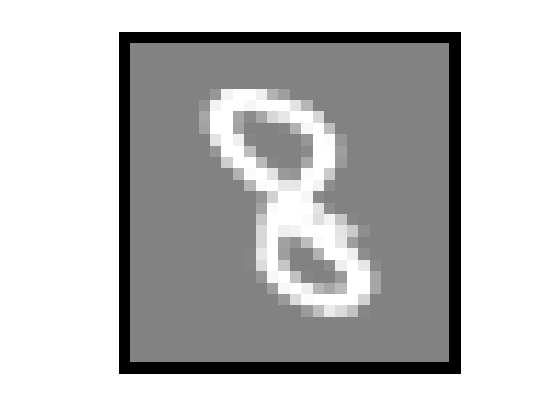

In [15]:
% Load images and labels
X = loadMNISTImages('../t10k-images.idx3-ubyte');
y = loadMNISTLabels('../t10k-labels.idx1-ubyte');
y(y == 0) = 10;

% Get the number of test examples
m = size(X, 1);

input_layer_size  = 784; % 28x28 Input Images of Digits
hidden_layer_size = 35;  % 35 hidden units
num_labels        = 10;  % 10 labels

% Load weights
load('../nn_params.mat');

% Unroll into Theta1 and Theta2 as they have been saved as rolled vectors
Theta1 = reshape(nn_params(1:hidden_layer_size * (input_layer_size + 1)), ...
                 hidden_layer_size, (input_layer_size + 1));
Theta2 = reshape(nn_params((1 + (hidden_layer_size * (input_layer_size + 1))):end), ...
                 num_labels, (hidden_layer_size + 1));

% Display accuracy for the whole test set
pred = predict(Theta1, Theta2, X);
fprintf('Training Set Accuracy (percentage of correct guesses): %f\n\n', mean(double(pred == y)) * 100);

% Test
random_int = 111
displayData(X(random_int, :));
pred = predict(Theta1, Theta2, X(random_int,:));
fprintf('Prediction for given image: %d (digit %d). Actual label: %d\n', pred, mod(pred, 10), y(random_int));

## Extra: Visualizing the hidden layer

We can display all of the 35 hidden units to see what features they are capturing.

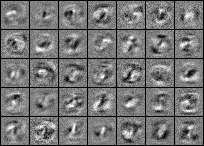

In [19]:
% Load images and labels
X = loadMNISTImages('../t10k-images.idx3-ubyte');
y = loadMNISTLabels('../t10k-labels.idx1-ubyte');
y(y == 0) = 10;

% Get the number of test examples
m = size(X, 1);

input_layer_size  = 784; % 28x28 Input Images of Digits
hidden_layer_size = 35;  % 35 hidden units
num_labels        = 10;  % 10 labels

% Load weights
load('../nn_params.mat');

% Unroll into Theta1 and Theta2 as they have been saved as rolled vectors
Theta1 = reshape(nn_params(1:hidden_layer_size * (input_layer_size + 1)), ...
                 hidden_layer_size, (input_layer_size + 1));
Theta2 = reshape(nn_params((1 + (hidden_layer_size * (input_layer_size + 1))):end), ...
                 num_labels, (hidden_layer_size + 1));
                 
displayData(Theta1(:, 2:end));